# Importar Librerias

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Accesos en el panorama nacional y regional

Como se realizó en el notebook de Data Wrangling, se pueden llegar a los datos nacionales a partir de uno de los dataframes regionales, en este caso se usa el archivo de rangos de velocidad.

In [25]:
rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")
rango_velocidad_regional_unpivot.head()

Año  Trimestre        Provincia Rango Velocidad  Accesos
0  2022          3     Buenos Aires  HASTA 512 kbps    29985
1  2022          3  Capital Federal  HASTA 512 kbps      517
2  2022          3        Catamarca  HASTA 512 kbps       71
3  2022          3            Chaco  HASTA 512 kbps      461
4  2022          3           Chubut  HASTA 512 kbps      109

In [26]:
nacional_accesos = rango_velocidad_regional_unpivot.groupby(["Año", "Trimestre"])['Accesos'].sum().reset_index() 
nacional_accesos.head()

Año  Trimestre  Accesos
0  2014          1  6272846
1  2014          2  6348745
2  2014          3  6367671
3  2014          4  6475485
4  2015          1  6623212

Text(0.5, 1.0, 'Accesos por Año y Trimestre')

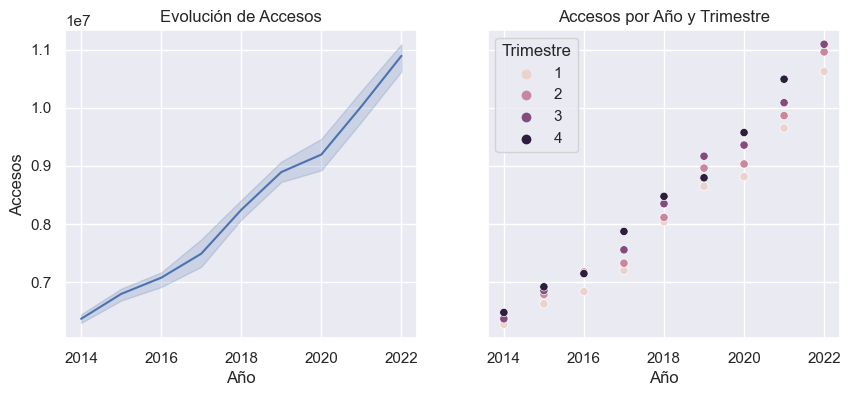

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.lineplot(data=nacional_accesos, x="Año", y="Accesos", ax=ax[0])
ax[0].set_xlabel('Año')
ax[0].set_title('Evolución de Accesos')

sns.scatterplot(data=nacional_accesos, x="Año", y="Accesos", hue="Trimestre", ax=ax[1])
ax[1].set_xlabel('Año')
ax[1].set_title('Accesos por Año y Trimestre')

La tendencia de los accesos es a subir cada año, con una pequeña anomalia en el 2019, donde en el 4to trimestre presenta menos accesos que en los primeros trimestres de ese mismo año. Ese comportamiento se presenta con mayor en visiblidad en ese año y se podria ver con mayor detalle en un lineplot continuo de año y trimestre.

In [28]:
# crear una columna vacia, luego convertir cada celda de año y trimestre en string y concatenerlos

nacional_accesos["Año-Trimestre"] = None
nacional_accesos["Año-Trimestre"] = [str(nacional_accesos["Año"][i]) + "-" + str(nacional_accesos["Trimestre"][i]) for i in range(len(nacional_accesos["Año-Trimestre"]))]

C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_10752\427781188.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


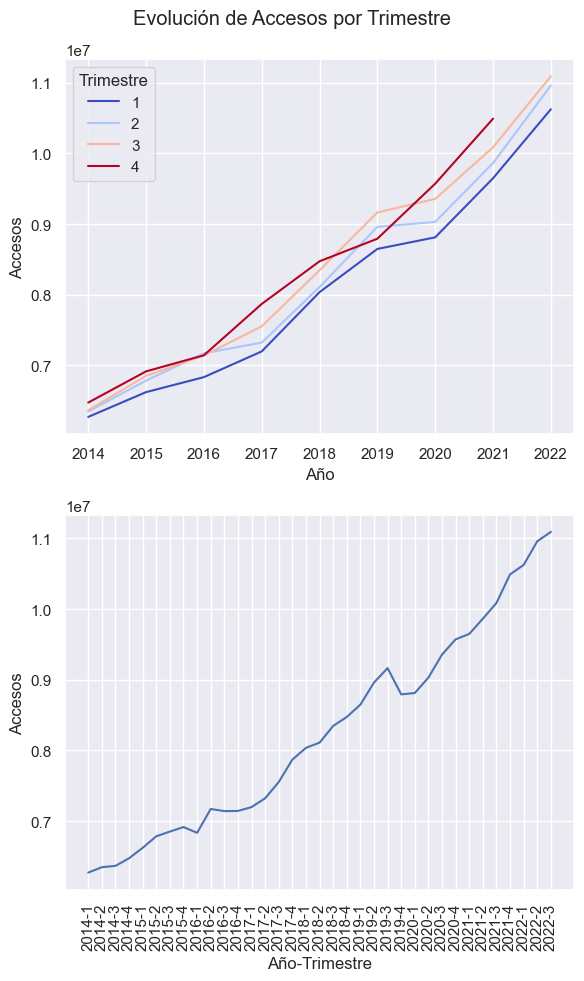

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(6, 10))

sns.lineplot(data=nacional_accesos, x="Año", y="Accesos", hue="Trimestre", ax=ax[0], palette="coolwarm")
ax[0].set_xlabel('Año')

sns.lineplot(data=nacional_accesos.sort_values(by="Año-Trimestre"), x="Año-Trimestre", y="Accesos", ax=ax[1])
ax[1].set_xlabel('Año-Trimestre')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

fig.suptitle('Evolución de Accesos por Trimestre')

plt.tight_layout()

También se puede observar que los valores de trimestre se encuentran mas concentrados entre los años 2014 y 2016, esto muestra el menor progreso que hubo en esos años en terminos de cubertura si los comparamos en los años posteriores. En los graficos de distribución se puede observar mejor.

Text(0.5, 1.0, 'Diagrama de violin de Accesos por año')

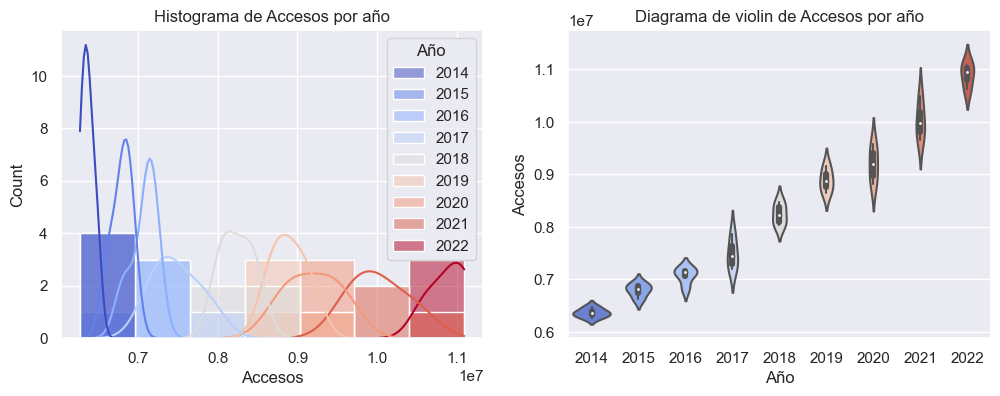

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=nacional_accesos, x="Accesos", hue="Año", palette="coolwarm", kde=True, ax=ax[0])
ax[0].set_xlabel('Accesos')
ax[0].set_title('Histograma de Accesos por año')

sns.violinplot(data=nacional_accesos, y="Accesos", x="Año", palette="coolwarm", ax=ax[1])
ax[1].set_xlabel('Año')
ax[1].set_title('Diagrama de violin de Accesos por año')

En el histograma se puede ver como se concentran los valores menores de Accesos para los primeros años del dataset, lo cual es esperable porque, como se mencionó anteriormente, el numero de accesos aumenta cada año, pero en el diagrama de violin se puede observar entre 2014 y 2016 como estan concentrados horizontalmente los datos, es decir, durante esos años hubo poco progreso (vertical) en ese periodo de tiempo, como se vió en el grafico de trimestres, mientras que en los años posteriores se ve como los valores minimos y maximos de cada año estan mas separados y por lo tanto hubo mayores saltos de acceso a internet en esos periodos.

Para facilitar el analisis provincial, se agruparan las provincias en cuatro regiones principales: Noroeste (NOA), Nordeste(NEA), Central, Cuyo y Patagonia

In [16]:
regional_accesos = rango_velocidad_regional_unpivot.groupby(["Provincia", "Año", "Trimestre"])['Accesos'].sum().reset_index()   
regional_accesos.head()

Provincia   Año  Trimestre  Accesos
0  Buenos Aires  2014          1  2624541
1  Buenos Aires  2014          2  2659316
2  Buenos Aires  2014          3  2647181
3  Buenos Aires  2014          4  2705953
4  Buenos Aires  2015          1  2754612

In [15]:
regional_accesos["Provincia"].unique()

array(['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe',
       'Mendoza', 'Entre Ríos', 'Tucumán', 'Salta', 'Misiones', 'Chubut',
       'Neuquén', 'Río Negro', 'Corrientes', 'Chaco',
       'Santiago Del Estero', 'San Luis', 'Jujuy', 'La Pampa', 'San Juan',
       'La Rioja', 'Catamarca', 'Formosa', 'Tierra Del Fuego',
       'Santa Cruz'], dtype=object)

In [55]:
noa = ['Tucumán', 'Salta', 'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Catamarca']
nea = ['Corrientes', 'Chaco', 'Misiones', 'Formosa']
central = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe', 'Entre Ríos']
cuyo = ['Mendoza', 'San Luis', 'San Juan']
patagonia = ['Chubut','Neuquén', 'Río Negro', 'Tierra Del Fuego','Santa Cruz', 'La Pampa']

Una vez definidas las regiones, se crea una función que realizar graficos de barras recibiendo como argumentos una lista de provincias, el numero de columnas que deseamos y el ancho y alto de la figura resultante.

In [51]:
def barplot_list(lista, columnas, ancho, altura):
    # carga de datos y agrupacion de columnas
    rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")
    regional_accesos = rango_velocidad_regional_unpivot.groupby(["Provincia", "Año", "Trimestre"])['Accesos'].sum().reset_index()  
    
    # crea un df de solo las provincias de la lista
    df_filtrado = regional_accesos[regional_accesos['Provincia'].isin(lista)]
    
    # configurar los subplots en función de la cantidad de provincias
    # con un numero de columnas definido, crea una figura lo mas simetrica posible
    num_provincias = len(lista)
    num_columnas = columnas
    num_filas = int((num_provincias + 1) / num_columnas)  # Redondear hacia arriba
    
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(ancho, altura))
    axes = axes.flatten() 
    # flatten() para convertir una matriz bidimensional en una matriz unidimensional.
    # permite iterar fácilmente sobre los subplots en un solo bucle en lugar de tener que manejar una matriz bidimensional
   
    # Iterar sobre las provincias
    for i, provincia in enumerate(lista):
        ax = axes[i]
        data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
        sns.barplot(data=data_provincia, x="Año", y="Accesos", ax=ax)
        ax.set_title(provincia)

    # ajustar elementos de los graficos para que no esten tan juntos
    plt.tight_layout()

    return plt.show()


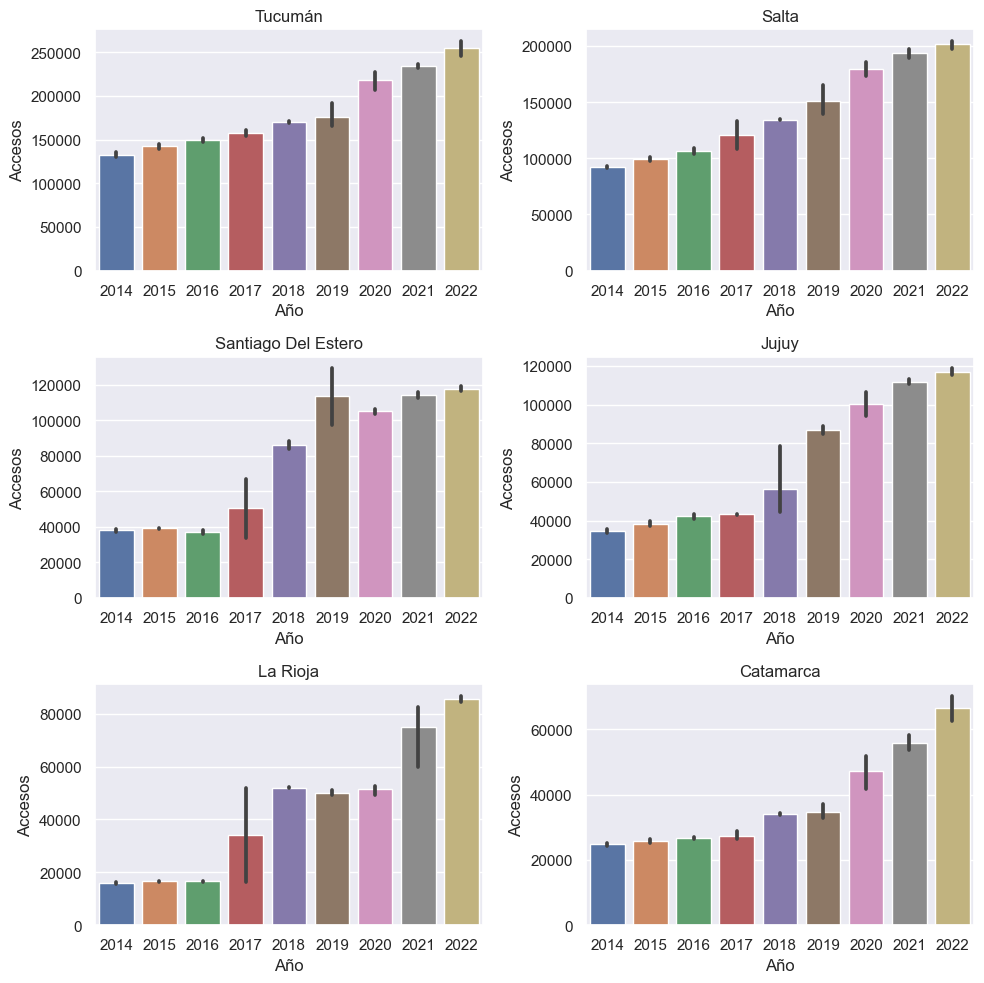

In [52]:
barplot_list(noa, 2, 10, 10)

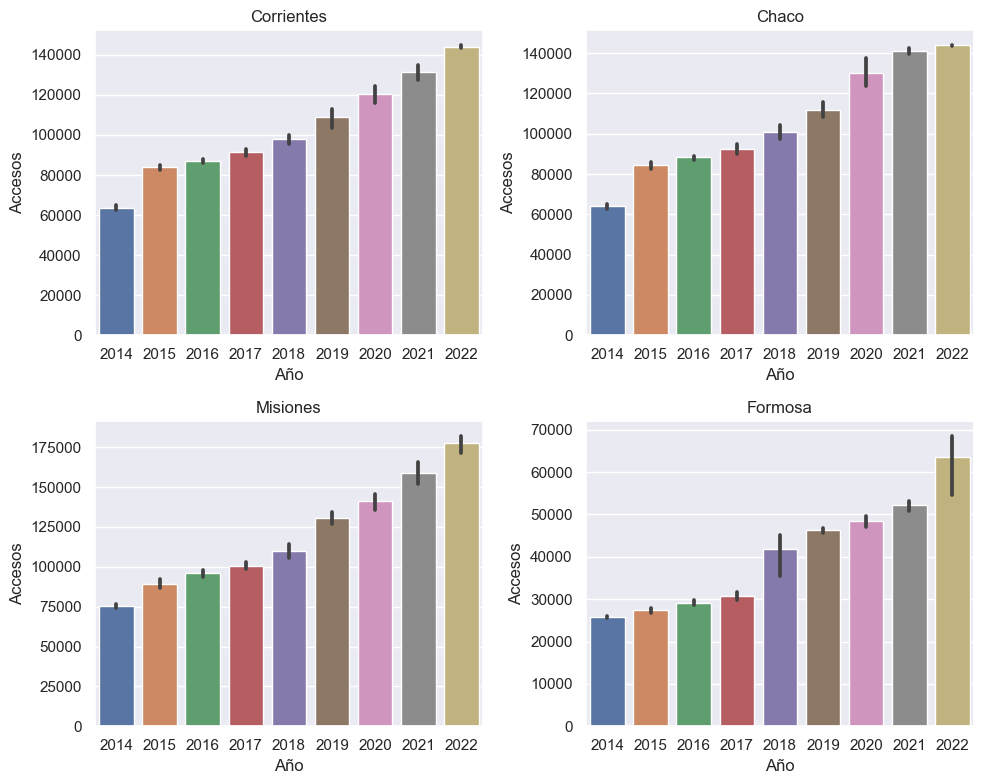

In [54]:
barplot_list(nea, 2, 10, 8)

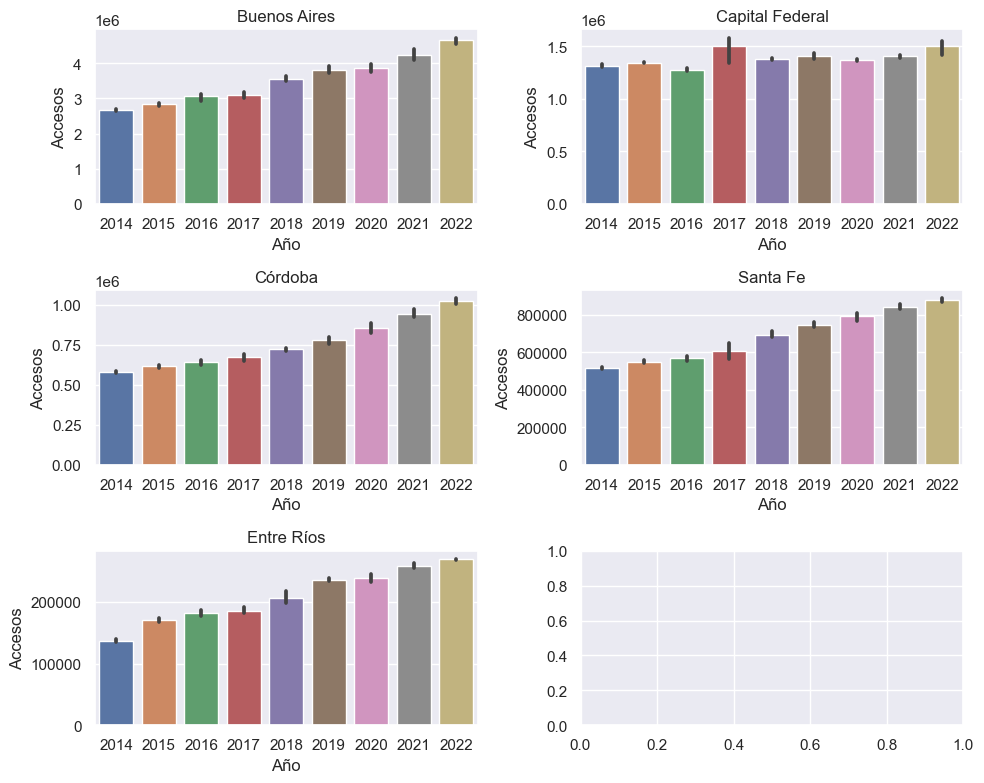

In [55]:
barplot_list(central, 2, 10, 8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


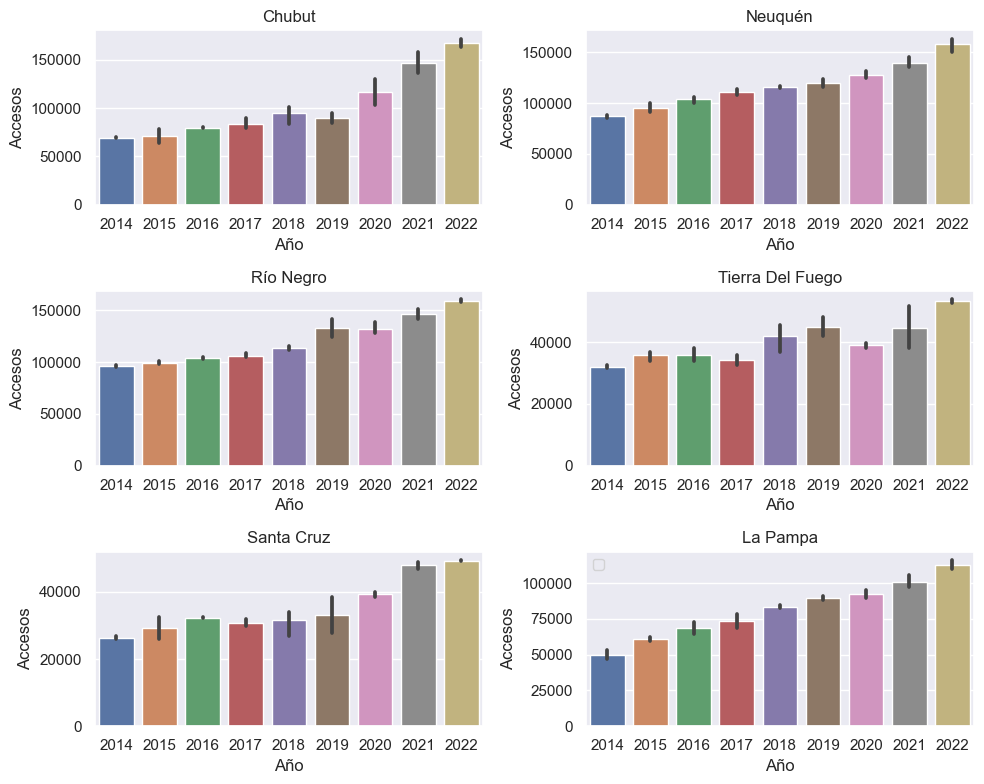

In [80]:
barplot_list(patagonia, 2, 10, 8)

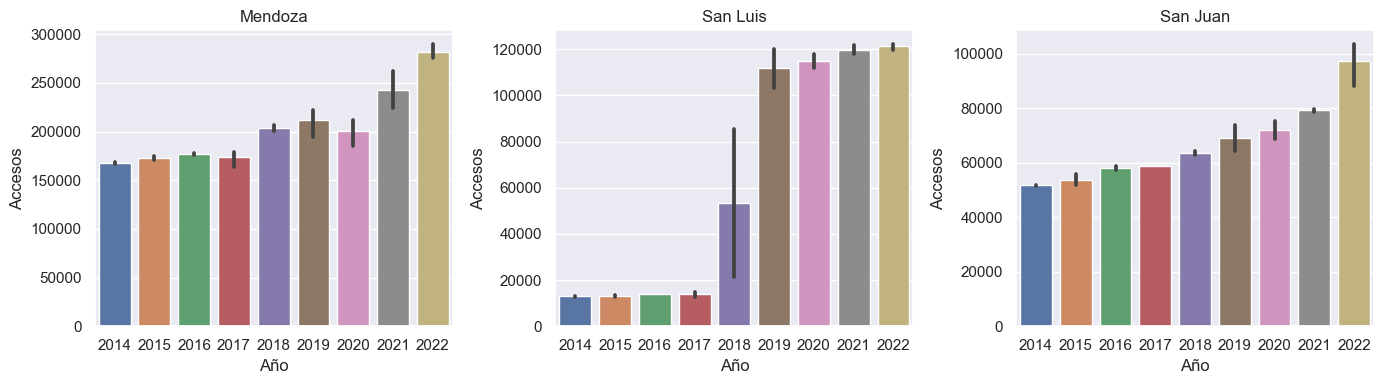

In [56]:
barplot_list(cuyo, 3, 14, 4)

En general, la variable Accesos en todas las provincias tiene un comportamiento ascendente, pero hay periodos donde el progreso no es muy notorio y se ve cierto estancamiento como en el caso de Mendoza 2014-2017, o Capital Federeal 2014-2022.

La barra negra que hay en cada barra es una medida de variabilidad de los datos, si la barra es corta, como en la mayoria de los años, significa que no hay mucha diferencia en los datos trimestrales de ese año. Si la barra es muy grande, como en el caso de San Luis 2018 o La Rioja 2017 quiere decir que la variabilidad es muy grande. Esto puede deberse a errores de medicion o a programas locales de inversion en infraestructura que se tradujeron en mayor accesiblidad para la población.

Ahora, para hallar las proporciones de la cantidad de accesos de acuerdo a las provincias, se crea un funcion que crea un grafico de tartas para un año dado, esta funcion recibe el año a analizar y el umbral. El umbral, en ese caso, es el porcentaje (en fracción) que define que provincias van a entrar a la categoria de "Otros", es decir, para evitar que valores muy pequeños en el grafico, se define un minimo para entrar a ser representado como provincia. Si el umbral es 5% (0.05) quiere decir que si los accesos de esa provincia no supera el 5% del total de accesos nacional, los accesos de esta provincia pasaran parte a la categoria llamada "Otros".

In [85]:
def pieplot_anio (anio, umbral):
    # carga de dataframe
    rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")

    # filtrar df por año y se agrupa por provincias
    accesos_por_provincia = rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot["Año"] == anio]
    accesos_provincia_agrupado = accesos_por_provincia.groupby('Provincia')['Accesos'].sum()

    # se usa el umbral definido para crear la categoria "Otros"
    umbral = umbral
    total_accesos = accesos_provincia_agrupado.sum()
    valores_pequenos = accesos_provincia_agrupado[accesos_provincia_agrupado < umbral * total_accesos]
    valor_otros = valores_pequenos.sum()

    # se usa el umbral para crear las categorias que no entran en "Otros"
    accesos_provincia_agrupado_nuevo = accesos_provincia_agrupado[accesos_provincia_agrupado >= umbral * total_accesos]
    accesos_provincia_agrupado_nuevo['Otros'] = valor_otros

    # %1.1f%% es el formato de salida del numero, un entero, un decimal seguido el simbolo %
    plt.pie(accesos_provincia_agrupado_nuevo.values, labels=accesos_provincia_agrupado_nuevo.index, autopct='%1.1f%%')
    
    return plt.title("Proporción de Accesos por Provincia del año " + str(anio))

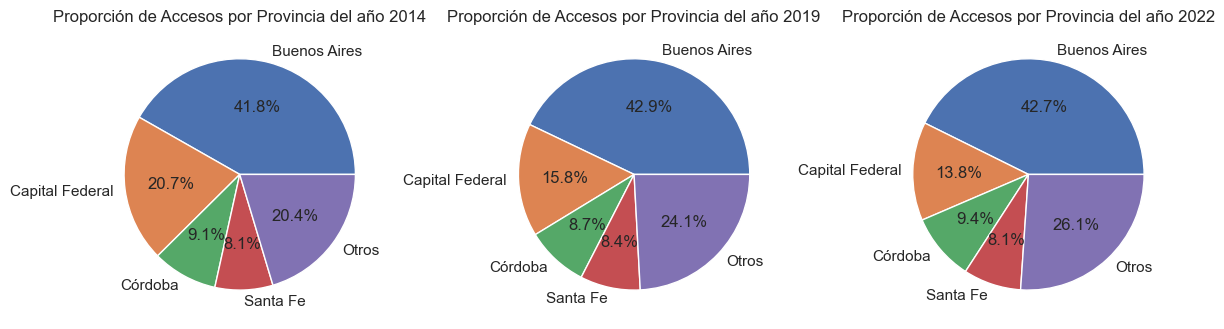

In [90]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
# sca es set current axis
# plt.sca(ax[0]), se establece el primer eje (ax[0]) como el eje activo actual, lo que significa que todas las 
# operaciones de trazado posteriores se realizarán en ese subplot

plt.sca(ax[0])
pieplot_anio(2014, 0.03)

plt.sca(ax[1])
pieplot_anio(2019, 0.03)

plt.sca(ax[2])
pieplot_anio(2022, 0.03)

plt.tight_layout()



Aqui se puede observar que los accesos de la provincia de Buenos Aires representa casi la mitad de los accesos del pais durante todo el periodo registrado, mientras que la proporción de los accesos de la Capital Federal ha bajado significativamente. Teniendo en cuenta que, en cantidad, los accesos de la Capital Federal se han mantenido constantes, la bajada en su proporción indica un aumento de los accesos en el resto del pais.

# Rangos de velocidad de descarga

## Datos Nacionales

Se extraen los datos nacionales a partir de los datos regionales al igual que en la seccion anterior.

In [31]:
rango_velocidad_nacional_unpivot = rango_velocidad_regional_unpivot.groupby(["Año", "Trimestre", "Rango Velocidad"])['Accesos'].sum().reset_index()
rango_velocidad_nacional_unpivot.head()

Año  Trimestre      Rango Velocidad  Accesos
0  2014          1    + 1 Mbps - 6 Mbps  5130294
1  2014          1  + 10 Mbps - 20 Mbps   101127
2  2014          1  + 20 Mbps - 30 Mbps      345
3  2014          1            + 30 Mbps    11595
4  2014          1  + 512 Kbps - 1 Mbps   687619

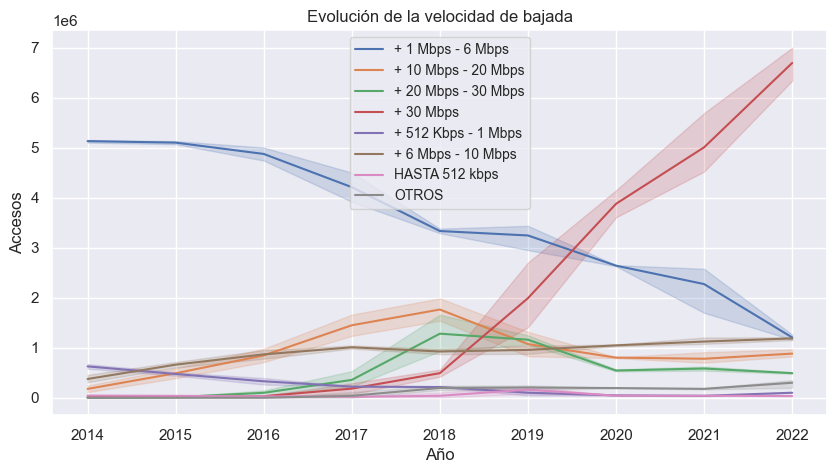

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.lineplot(data=rango_velocidad_nacional_unpivot, x="Año", y="Accesos", hue="Rango Velocidad")
ax.set_xlabel('Año')
ax.set_title('Evolución de la velocidad de bajada')
plt.legend(fontsize='small')

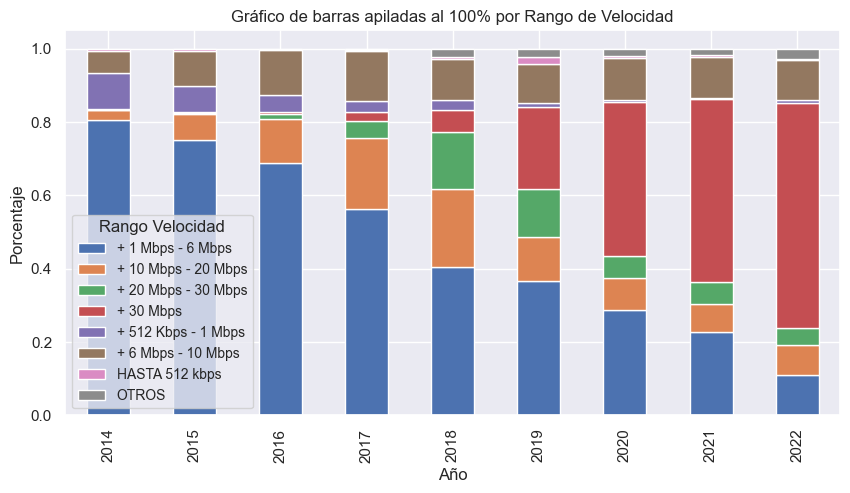

In [56]:
# transform() calcula una funcion de agregacion y devuelve el resultado en una serie
serie_totales = rango_velocidad_nacional_unpivot.groupby('Año')['Accesos'].transform('sum')
rango_velocidad_nacional_unpivot['Porcentaje'] = rango_velocidad_nacional_unpivot['Accesos'] / serie_totales

# con pivot_table se hace el proceso inverso que se hizo en el anterior notebook (melt()), 
# pero esta vez se usan porcentajes como valores y no accesos
tabla_dinamica = rango_velocidad_nacional_unpivot.pivot_table(index='Año', columns='Rango Velocidad', values='Porcentaje', aggfunc='sum')

fig, ax = plt.subplots(figsize=(10, 5))
tabla_dinamica.plot.bar(stacked=True, ax=ax)
ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje')
ax.set_title('Gráfico de barras apiladas al 100% por Rango de Velocidad')
plt.legend(title='Rango Velocidad', fontsize='small')

plt.show()


Hay cambios de velocidad en todos los rangos a traves del tiempo, pero hay dos rangos que resaltan tanto en el grafico de lineas como en el grafico de barras apiladas. El rango de 1 - 6 Mbps se reduce desde 80% en 2014 hasta el 10% en 2022, mientras que el rango de mas de 30 Mbps, casi inexistente hasta el 2017, aumenta hasta alrededor del 60% par el año 2022.

## Datos Regionales

In [32]:
rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")
rango_velocidad_regional_unpivot.head()

Año  Trimestre        Provincia Rango Velocidad  Accesos
0  2022          3     Buenos Aires  HASTA 512 kbps    29985
1  2022          3  Capital Federal  HASTA 512 kbps      517
2  2022          3        Catamarca  HASTA 512 kbps       71
3  2022          3            Chaco  HASTA 512 kbps      461
4  2022          3           Chubut  HASTA 512 kbps      109

In [ ]:
rango_velocidad_regional_unpivot.describe()

Año    Trimestre       Accesos
count  6714.000000  6714.000000  6.714000e+03
mean   2017.884718     2.457551  4.303703e+04
std       2.528337     1.104842  1.856786e+05
min    2014.000000     1.000000 -1.945000e+03
25%    2016.000000     1.000000  6.700000e+01
50%    2018.000000     2.000000  3.376000e+03
75%    2020.000000     3.000000  2.312500e+04
max    2022.000000     4.000000  3.618689e+06

La función describe() muestra valores negativos de accesos, se puede deshacer de estos con una comprehension lista condicional reemplazando esos valores negativos con ceros.

In [ ]:
rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot["Accesos"] < 0]

Año  Trimestre   Provincia Rango Velocidad  Accesos
6035  2021          1    La Rioja           OTROS       -1
6043  2021          1  Santa Cruz           OTROS    -1945

In [60]:
rango_velocidad_regional_unpivot["Accesos"] = [0 if x < 0 else x for x in rango_velocidad_regional_unpivot["Accesos"]]

De la misma forma que se realizó la funcion para crear subplots de graficos de barras, se realiza otra para graficar la evolución de los rangos de velocidad por region. En este caso se agregan dos lineas extras para ubicar la leyenda de la mejor manera posible para que obstaculice la lectura apropiada.

In [111]:
def lineplot_list(lista, columnas, ancho, altura, leyenda_letra, leyenda_x, leyenda_y):
    # carga de datos 
    rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")
    
    # crea un df de solo las provincias de la lista
    df_filtrado = rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot['Provincia'].isin(lista)]
    
    # configurar los subplots en función de la cantidad de provincias
    # con un numero de columnas definido, crea una figura lo mas simetrica posible
    num_provincias = len(lista)
    num_columnas = columnas
    num_filas = int((num_provincias + 1) / num_columnas)  # Redondear hacia arriba
    
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(ancho, altura))
    axes = axes.flatten() 
    # flatten() para convertir una matriz bidimensional en una matriz unidimensional.
    # permite iterar fácilmente sobre los subplots en un solo bucle en lugar de tener que manejar una matriz bidimensional
   
    # Iterar sobre las provincias
    for i, provincia in enumerate(lista):
        ax = axes[i]
        data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
        sns.lineplot(data=data_provincia, x="Año", y="Accesos", hue="Rango Velocidad", ax=ax)
        ax.set_title(provincia)
        # Remover la leyenda de los subplots
        ax.get_legend().remove()
        
    # Agregar una única leyenda para la figura
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Rango Velocidad', bbox_to_anchor=(leyenda_x, leyenda_y), prop={'size': leyenda_letra})

    # ajustar elementos de los graficos para que no esten tan juntos
    plt.tight_layout()

    return plt.show()


Notar que la nueva función recibe tres argumentos mas: las coordendas horizontal y vertical de la posicion de la leyenda y el tamaño de letra de esta.

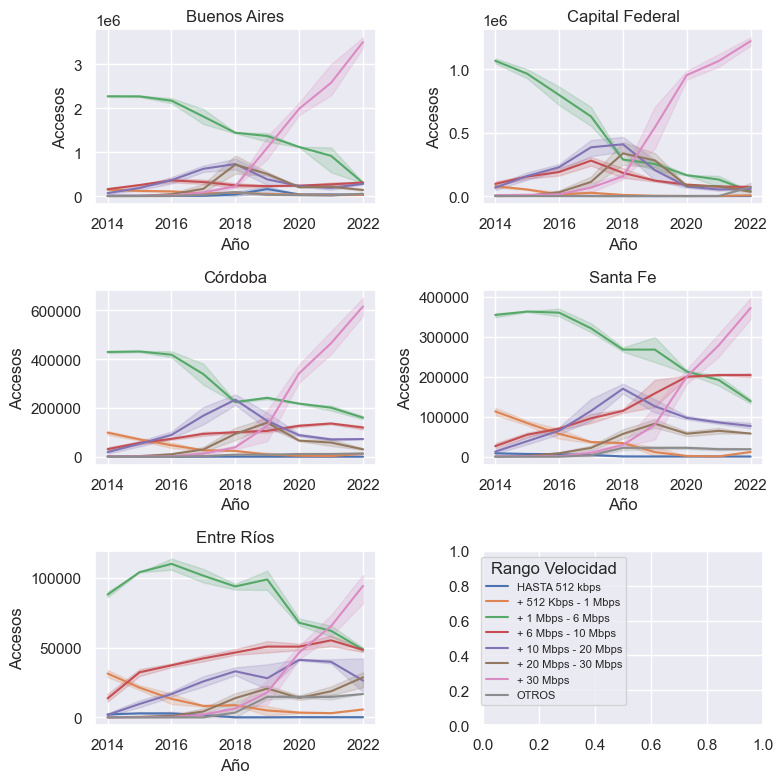

In [112]:
lineplot_list(central, 2, 8, 8, 8, 0.8, 0.3)

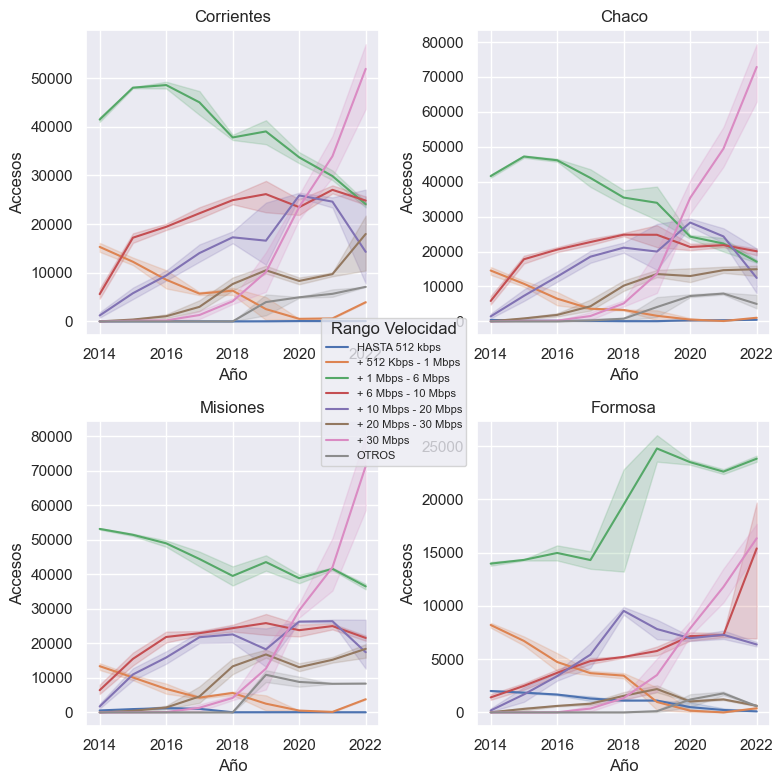

In [116]:
lineplot_list(nea, 2, 8, 8, 8, 0.6, 0.6)

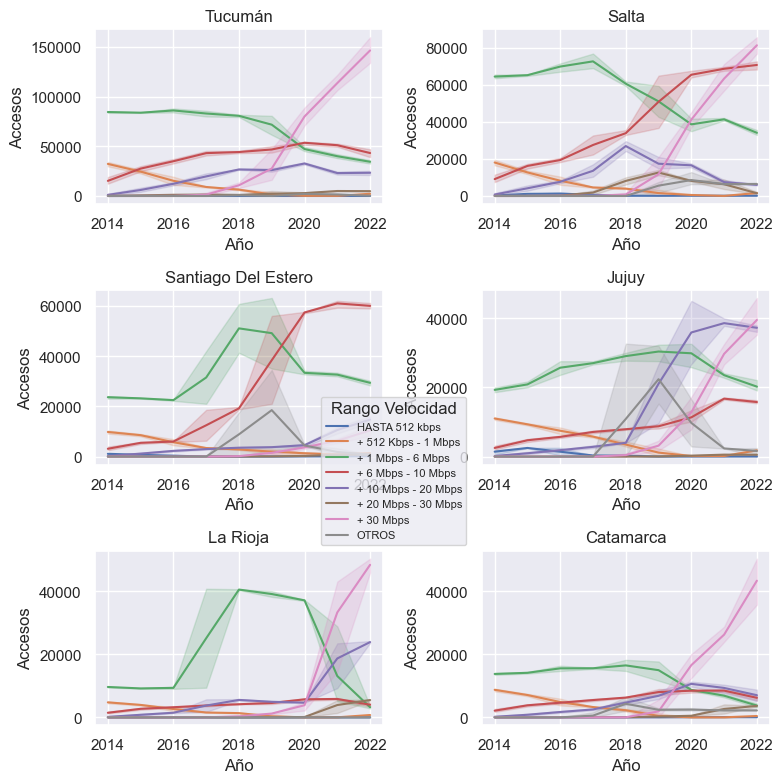

In [120]:
lineplot_list(noa, 2, 8, 8, 8, 0.6, 0.5)

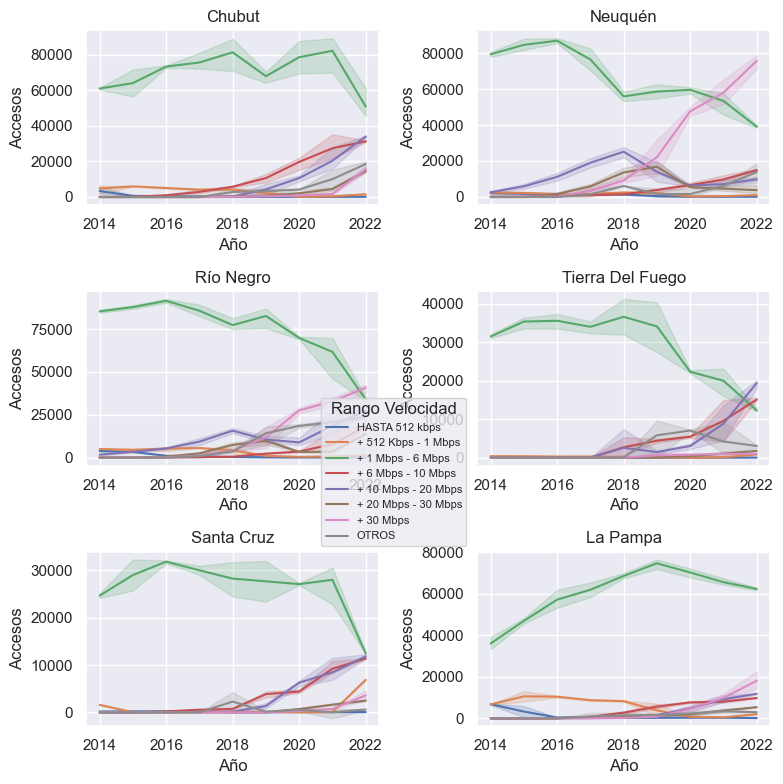

In [126]:
lineplot_list(patagonia, 2, 8, 8, 8, 0.6, 0.5)

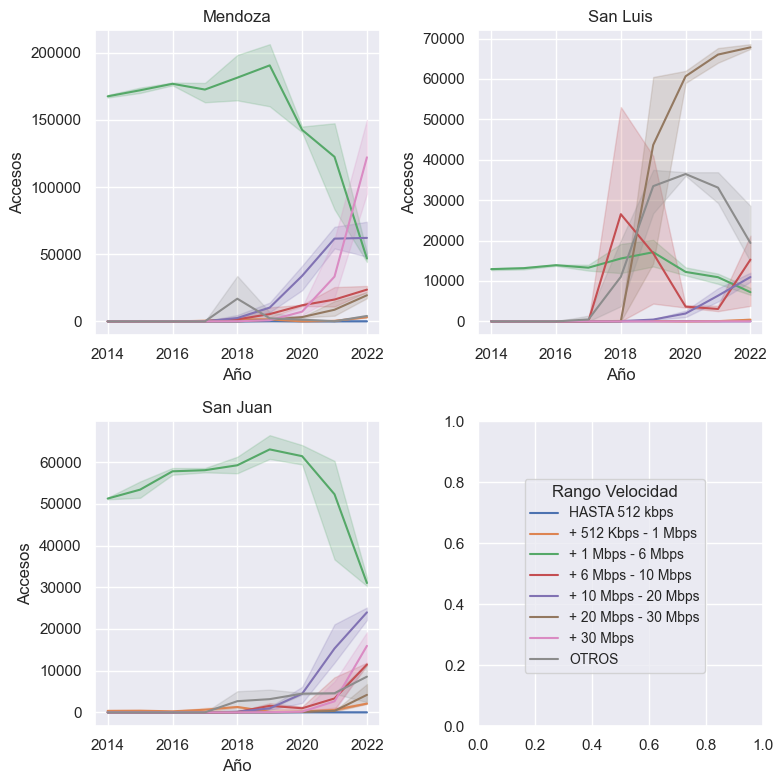

In [128]:
lineplot_list(cuyo, 2, 8, 8, 10, 0.9, 0.4)

Todas las regiones tiene un comportamiento similar a los datos nacionales, hay excepciones como el caso de Formosa donde el rango de velocidad de 1-6 Mbps se mantiene arriba o el caso de San Luis donde el rango de mas de 30 Mbps no tiene un aumento tan grande pero si el rango de 20 - 30 Mbps.

# Covertura y Velocidad Media

## Datos nacionales

In [6]:
penetracion_velocidad_nacional_internet_fijo = pd.read_csv("../processed_data/penetracion_velocidad_nacional_internet_fijo.csv")
penetracion_velocidad_nacional_internet_fijo.head()

Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2022          3                         76.64                     23.95   
1  2022          2                         75.97                     23.72   
2  2022          1                         73.88                     23.05   
3  2021          4                         73.18                     22.81   
4  2021          3                         70.58                     21.98   

   Mbps (Media de bajada)  
0                   62.46  
1                   58.44  
2                   55.11  
3                   52.34  
4                   48.46

In [22]:
penetracion_velocidad_nacional_internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Mbps (Media de bajada)        35 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.5 KB


In [24]:
penetracion_velocidad_nacional_internet_fijo.describe()

Año  Trimestre  Accesos por cada 100 hogares  \
count    35.000000  35.000000                     35.000000   
mean   2017.885714   2.457143                     60.275429   
std       2.564135   1.120474                      8.148909   
min    2014.000000   1.000000                     49.550000   
25%    2016.000000   1.500000                     52.985000   
50%    2018.000000   2.000000                     59.160000   
75%    2020.000000   3.000000                     66.050000   
max    2022.000000   4.000000                     76.640000   

       Accesos por cada 100 hab  Mbps (Media de bajada)  
count                 35.000000               35.000000  
mean                  18.606286               21.827143  
std                    2.662968               19.230717  
min                   15.050000                3.620000  
25%                   16.245000                5.250000  
50%                   18.240000               13.850000  
75%                   20.475000               39.495000  
max                   23.950000               62.460000

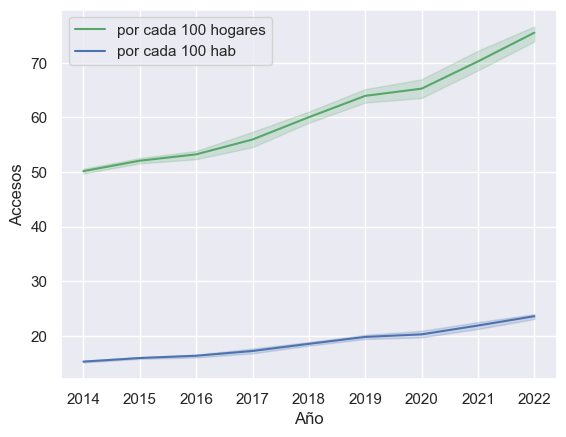

In [186]:
sns.lineplot(data=penetracion_velocidad_nacional_internet_fijo, y="Accesos por cada 100 hogares", x="Año", color="g", label="por cada 100 hogares")
sns.lineplot(data=penetracion_velocidad_nacional_internet_fijo, x="Año", y="Accesos por cada 100 hab", label="por cada 100 hab")
plt.ylabel('Accesos')
plt.legend()

Al igual que los accesos totales, es esperable que los accesos por cada 100 hogares y 100 personas tengan un comportamiento ascendente con el tiempo como se muestra en la figura. Tambien es esperable que tenga la misma forma ambas lineas pues se originan de operaciones similares, lo único que cambia es la escala de los valores. Esto también se nota en los siguiente graficos.

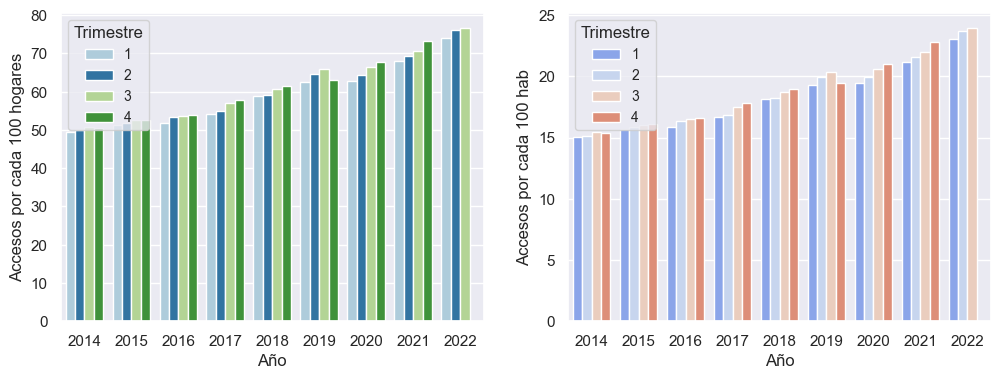

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=penetracion_velocidad_nacional_internet_fijo, y="Accesos por cada 100 hogares", x="Año", hue="Trimestre", ax=ax[0], palette="Paired")
ax[0].set_xlabel('Año')
ax[0].legend(title='Trimestre', loc="upper left", fontsize="small" )

sns.barplot(data=penetracion_velocidad_nacional_internet_fijo, x="Año", y="Accesos por cada 100 hab", hue="Trimestre", ax=ax[1], palette="coolwarm")
ax[1].set_xlabel('Año')
ax[1].legend(title='Trimestre', loc="upper left", fontsize="small" )

Naturalmente, la visualización por Trimestre muestra el mismo comportamiento, incluso mostrando la baja de accesos per capita que existe entre el 2019 y 2020.

Text(0.5, 0, 'Año')

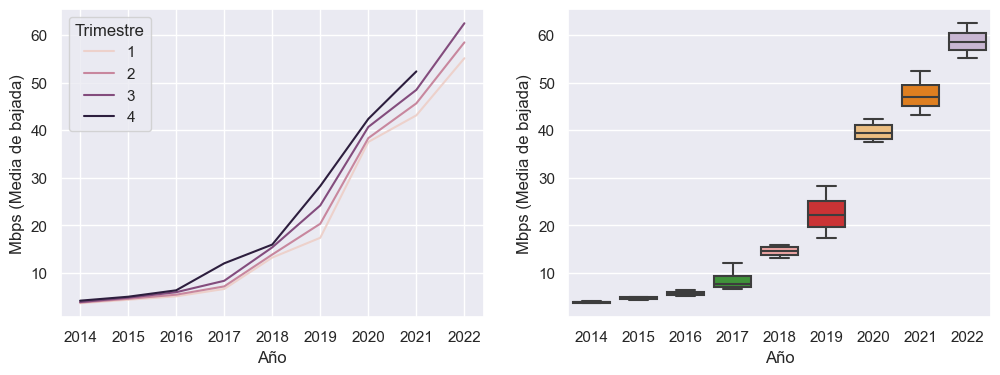

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(data=penetracion_velocidad_nacional_internet_fijo, y="Mbps (Media de bajada)", hue="Trimestre", x="Año", ax=ax[0])
ax[0].set_xlabel('Año')

sns.boxplot(data=penetracion_velocidad_nacional_internet_fijo, y="Mbps (Media de bajada)", x="Año", palette="Paired", ax=ax[1])
ax[1].set_xlabel('Año')


La evolución del promedio de velocidad de bajada es igual a la evolución de los accesos totales y accesos por habitantes y hogares, algo que coincide con el analisis de rangos de velocidad, pues los rangos mayores de velocidad tuvieron una subida grande desde el 2018. En el grafico de cajas se puede ver que, al igual que los accesos, entre el 2014 y 2016, la mejora en la velocidad es mucho menor, pues los valores estan concentrados en poco espacio, mientras que en el 2017 empieza a expandirse el rango intercuartilico y la distancia entre el valor maximo y minimo de ese año.

## Datos Regionales

In [47]:
penetracion_velocidad_regional_internet_fijo = pd.read_csv("../processed_data/penetracion_velocidad_regional_internet_fijo.csv")
penetracion_velocidad_regional_internet_fijo.head()

Año  Trimestre        Provincia  Accesos por cada 100 hogares  \
0  2022          3     Buenos Aires                         78.11   
1  2022          3  Capital Federal                        122.28   
2  2022          3        Catamarca                         65.33   
3  2022          3            Chaco                         43.86   
4  2022          3           Chubut                         84.38   

   Accesos por cada 100 hab  Mbps (Media de bajada)  
0                        26                   70.19  
1                        50                  101.05  
2                        17                   60.99  
3                        12                   53.21  
4                        26                   15.57

In [48]:
penetracion_velocidad_regional_internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
 4   Accesos por cada 100 hab      840 non-null    int64  
 5   Mbps (Media de bajada)        840 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.5+ KB


In [49]:
penetracion_velocidad_regional_internet_fijo.describe()

Año   Trimestre  Accesos por cada 100 hogares  \
count   840.000000  840.000000                    840.000000   
mean   2017.885714    2.457143                     49.065750   
std       2.528745    1.105009                     23.151885   
min    2014.000000    1.000000                      9.350000   
25%    2016.000000    1.000000                     32.107500   
50%    2018.000000    2.000000                     45.900000   
75%    2020.000000    3.000000                     61.865000   
max    2022.000000    4.000000                    124.060000   

       Accesos por cada 100 hab  Mbps (Media de bajada)  
count                840.000000              840.000000  
mean                  14.658333               13.857238  
std                    8.989528               14.666514  
min                    3.000000                2.570000  
25%                    8.000000                4.250000  
50%                   13.000000                7.095000  
75%                   19.000000               18.317500  
max                   52.000000              101.050000

Repitiendo la función de subplots para cada región, se modifica para presentar graficos de lineas de los accesos por cada 100 hogares. No se realizará para los accesos cada 100 habitantes pues ya se concluyó que presenta el mismo comportamiento solo que en diferente escala.

In [103]:
def lineplot_list_penetracion(lista, columnas, ancho, altura):
    # carga de datos 
    penetracion_velocidad_regional_internet_fijo = pd.read_csv("../processed_data/penetracion_velocidad_regional_internet_fijo.csv")
    
    # crea un df de solo las provincias de la lista
    df_filtrado = penetracion_velocidad_regional_internet_fijo[penetracion_velocidad_regional_internet_fijo['Provincia'].isin(lista)]
    
    # configurar los subplots en función de la cantidad de provincias
    # con un numero de columnas definido, crea una figura lo mas simetrica posible
    num_provincias = len(lista)
    num_columnas = columnas
    num_filas = int((num_provincias + 1) / num_columnas)  # Redondear hacia arriba
    
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(ancho, altura), sharex=True, sharey=True)
    axes = axes.flatten() 
    # flatten() para convertir una matriz bidimensional en una matriz unidimensional.
    # permite iterar fácilmente sobre los subplots en un solo bucle en lugar de tener que manejar una matriz bidimensional
   
    # Iterar sobre las provincias
    for i, provincia in enumerate(lista):
        ax = axes[i]
        data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
        sns.lineplot(data=data_provincia, x="Año", y="Accesos por cada 100 hogares", ax=ax)
        ax.set_title(provincia)
        

    # ajustar elementos de los graficos para que no esten tan juntos
    plt.tight_layout()

    return plt.show()


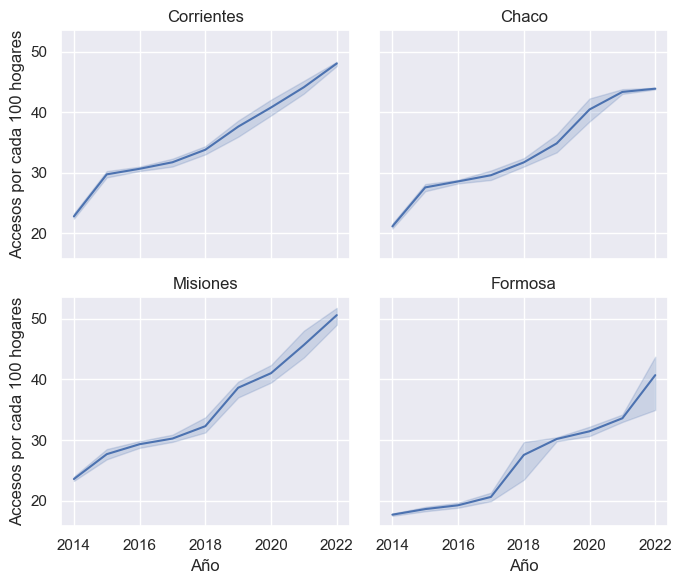

In [104]:
lineplot_list_penetracion(nea, 2, 7, 6)

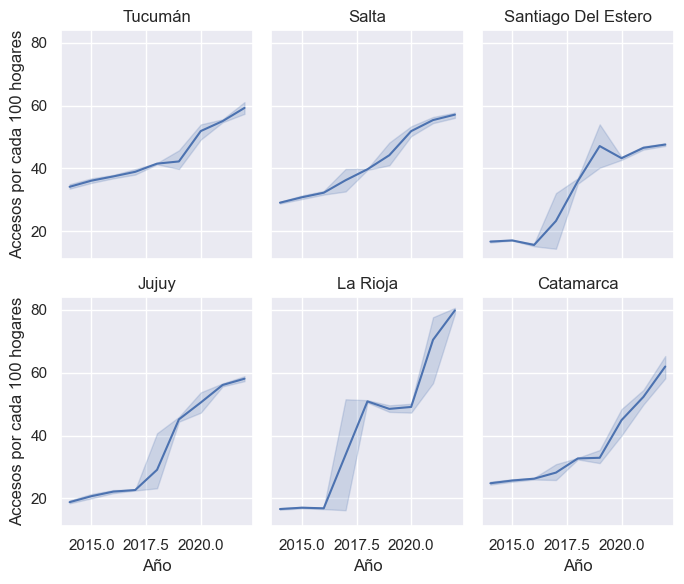

In [105]:
lineplot_list_penetracion(noa, 3, 7, 6)

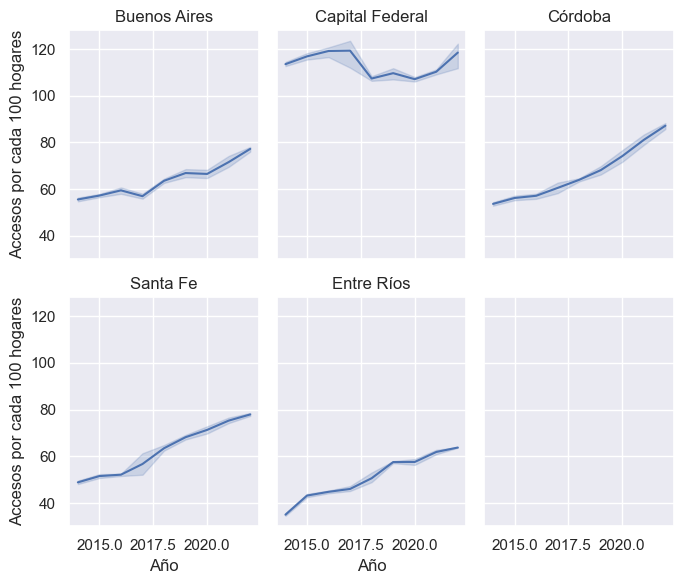

In [106]:
lineplot_list_penetracion(central, 3, 7, 6)

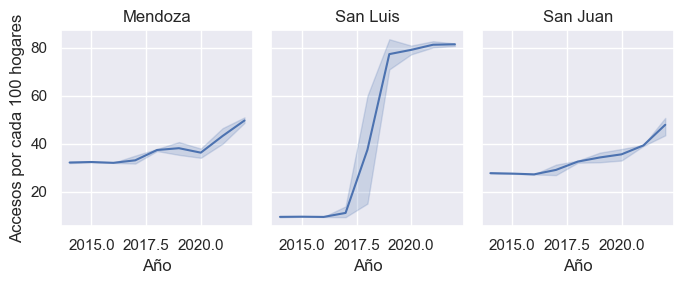

In [107]:
lineplot_list_penetracion(cuyo, 3, 7, 3)

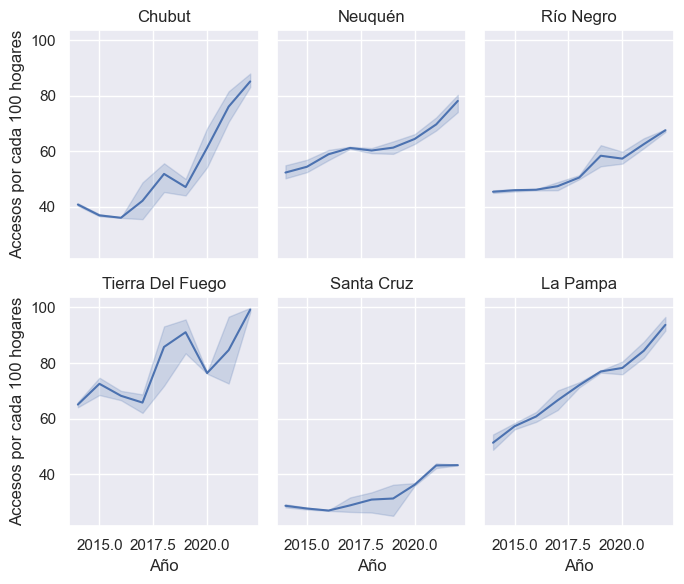

In [108]:
lineplot_list_penetracion(patagonia, 3, 7, 6)

La segunda razón por la que se escogió los accesos por cada 100 hogares, es por que da una visión mas facil a interpretar sobre la penetración de internet fijo. Un hogar puede tener mas de un acceso, por lo que la métrica puede sobrepasar el numero 100, como en el caso de Capital Federeal, lo cual se podria interpretar que, en promedio, todos los hogares de la ciudad tienen conexión a internet fijo.

Con los accesos por 100 habitantes, en el caso de la Capital Federal, como su métrica registra alrededor de 50, se puede interpretar de manera incorrecta que solo el 50% de las personas tienen conexión a internet fijo, pero en realidad significaria que 50% de las personas de Capital Federal tiene a su nombre una cuenta de este servicio.

Otros hallazgos interantes es la evolución de Tierra del Fuego de alrededor de un 65 accesos por cada 100 hogares a casi 100. La Rioja y San Luis también presentas mejoras muy grandes en estas métricas pasando aumentando casi 9 veces.

Ahora se realiza el mismo analisis para la velocidad media por provincia.

In [138]:
def lineplot_list_velocidad(lista, columnas, ancho, altura):
    # carga de datos y agrupacion de columnas
    penetracion_velocidad_regional_internet_fijo = pd.read_csv("../processed_data/penetracion_velocidad_regional_internet_fijo.csv")
    #regional_accesos = rango_velocidad_regional_unpivot.groupby(["Provincia", "Año", "Trimestre"])['Accesos'].sum().reset_index()
    
    # crea un df de solo las provincias de la lista
    df_filtrado = penetracion_velocidad_regional_internet_fijo[penetracion_velocidad_regional_internet_fijo['Provincia'].isin(lista)]
    
    # configurar los subplots en función de la cantidad de provincias
    # con un numero de columnas definido, crea una figura lo mas simetrica posible
    num_provincias = len(lista)
    num_columnas = columnas
    num_filas = int((num_provincias + 1) / num_columnas)  # Redondear hacia arriba
    
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(ancho, altura), sharey=True)
    axes = axes.flatten() 
    # flatten() para convertir una matriz bidimensional en una matriz unidimensional.
    # permite iterar fácilmente sobre los subplots en un solo bucle en lugar de tener que manejar una matriz bidimensional
   
    # Iterar sobre las provincias
    for i, provincia in enumerate(lista):
        ax = axes[i]
        data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
        sns.lineplot(data=data_provincia, x="Año", y="Mbps (Media de bajada)", ax=ax)
        ax.set_title(provincia)
        

    # ajustar elementos de los graficos para que no esten tan juntos
    plt.tight_layout()

    return plt.show()

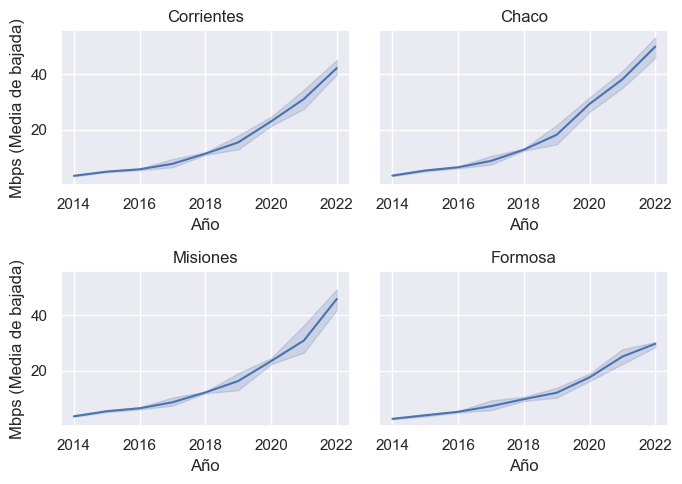

In [124]:
lineplot_list_velocidad(nea, 2, 7, 5)

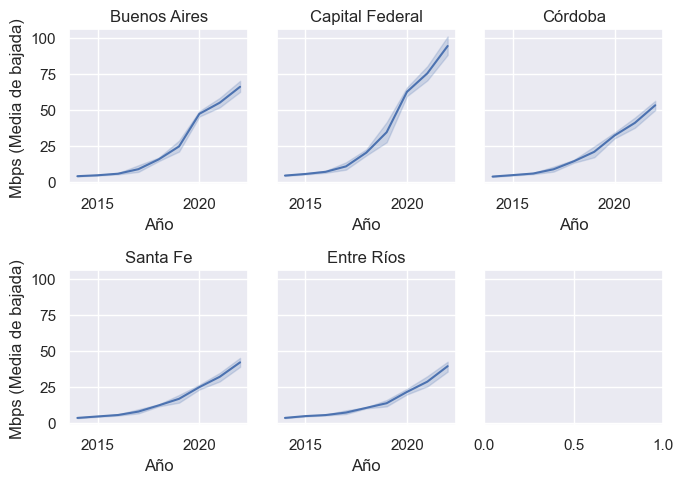

In [125]:
lineplot_list_velocidad(central, 3, 7, 5)

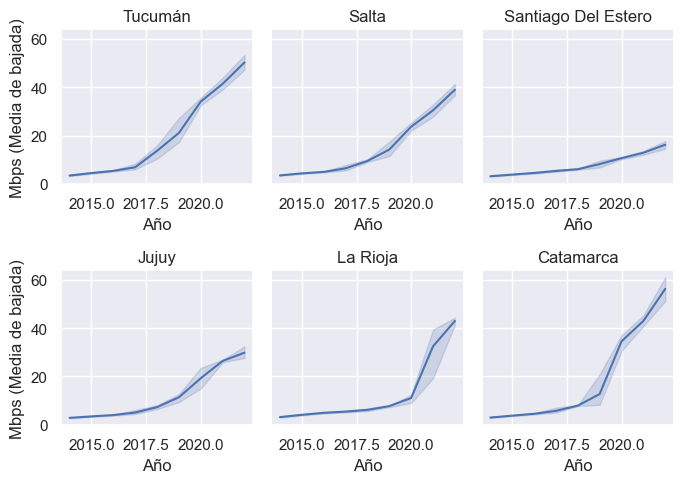

In [139]:
lineplot_list_velocidad(noa, 3, 7, 5)

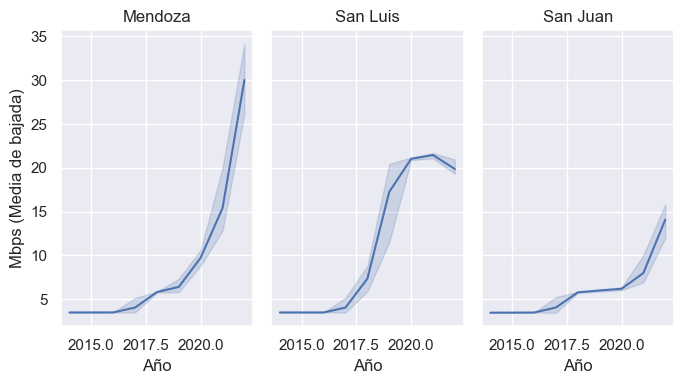

In [128]:
lineplot_list_velocidad(cuyo, 3, 7, 4)

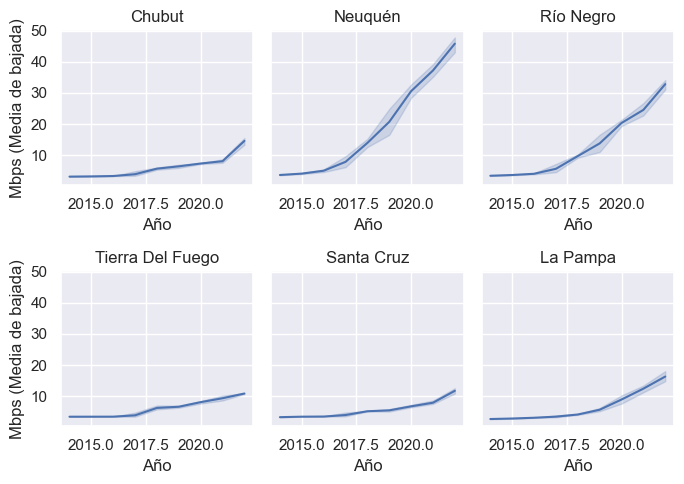

In [129]:
lineplot_list_velocidad(patagonia, 3, 7, 5)

El ritmo de mejora de velocidad de bajada promedio es diferente para cada region, incluso para cada provincia dentro de su propia region. Hay ritmos lentos como Tierra del Fuego, Santa Cruz y La Pampa y hay mejoras grandes y sosteniadas como Neuquen y Rio Negro. Tambien esta el caso de San Luis que presenta una subida repentina y una bajada despues del 2020.

Las provincias con mayor velocidad promedio actualmente son la Capital Federal y Buenos Aires con aproximadamente 100 y 75 Mbps respectivamente. Por detras estan Tucuman y Neuquen con casi 50 Mbps. Mientras que Tierra del Fuego y Santa Cruz presentan la menor velocidad con poco mas de 10 Mbps.

# Tipo de conexion

## Datos Nacionales

In [148]:
conexion_regional_unpivot = pd.read_csv("../processed_data/tipo_conexion_regional_unpivot.csv")
conexion_regional_unpivot.head()

Año  Trimestre        Provincia Tipo Conexion  Accesos
0  2022          3     Buenos Aires          ADSL   339648
1  2022          3  Capital Federal          ADSL   140791
2  2022          3        Catamarca          ADSL    10010
3  2022          3            Chaco          ADSL    27164
4  2022          3           Chubut          ADSL    45377

In [150]:
conexion_nacional_unpivot = conexion_regional_unpivot.groupby(["Año", "Trimestre", "Tipo Conexion"])['Accesos'].sum().reset_index()
conexion_nacional_unpivot.head()

Año  Trimestre Tipo Conexion  Accesos
0  2014          1          ADSL  3697066
1  2014          1    Cablemodem  2407330
2  2014          1  Fibra óptica   150323
3  2014          1         Otros    72930
4  2014          1      Wireless    70749

In [151]:
conexion_nacional_unpivot.describe()

Año   Trimestre       Accesos
count   175.000000  175.000000  1.750000e+02
mean   2017.885714    2.457143  1.659560e+06
std       2.534491    1.107520  1.792734e+06
min    2014.000000    1.000000  5.430000e+04
25%    2016.000000    1.000000  1.658445e+05
50%    2018.000000    2.000000  5.074560e+05
75%    2020.000000    3.000000  3.260023e+06
max    2022.000000    4.000000  6.073426e+06

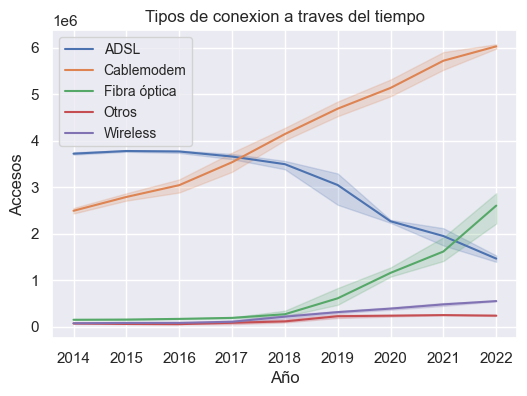

In [155]:
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.lineplot(data=conexion_nacional_unpivot, x="Año", y="Accesos", hue="Tipo Conexion")
ax.set_xlabel('Año')
ax.set_title('Tipos de conexion a traves del tiempo')
plt.legend(fontsize='small')

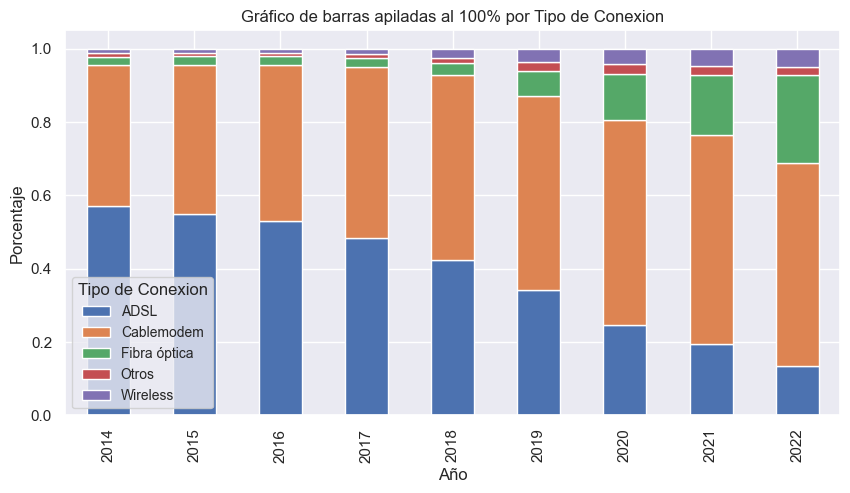

In [158]:
# transform() calcula una funcion de agregacion y devuelve el resultado en una serie
serie_totales = conexion_nacional_unpivot.groupby('Año')['Accesos'].transform('sum')
conexion_nacional_unpivot['Porcentaje'] = conexion_nacional_unpivot['Accesos'] / serie_totales

# con pivot_table se hace el proceso inverso que se hizo en el anterior notebook (melt()), 
# pero esta vez se usan porcentajes como valores y no accesos
tabla_dinamica = conexion_nacional_unpivot.pivot_table(index='Año', columns='Tipo Conexion', values='Porcentaje', aggfunc='sum')

fig, ax = plt.subplots(figsize=(10, 5))
tabla_dinamica.plot.bar(stacked=True, ax=ax)
ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje')
ax.set_title('Gráfico de barras apiladas al 100% por Tipo de Conexion')
plt.legend(title='Tipo de Conexion', fontsize='small')

plt.show()

Cablemodem es el tipo de conexion a internet mas popular y sigue creciendo, mientras que ADSL a venido decreciendo rapidamente. La fibra optica pasa por un estancamiento hasta el 2018 donde tiene subida grande y va ganando terreno año a año. Los accesos por conexion Wireless (antena satelital) tambien aumenta poco a poco, probablemnte empujado por las conexiones rurales.

## Datos Regionales

In [159]:
conexion_regional_unpivot.describe()

Año    Trimestre       Accesos
count  4200.000000  4200.000000  4.200000e+03
mean   2017.885714     2.457143  6.914834e+04
std       2.527540     1.104483  2.373364e+05
min    2014.000000     1.000000  0.000000e+00
25%    2016.000000     1.000000  9.520000e+02
50%    2018.000000     2.000000  9.747500e+03
75%    2020.000000     3.000000  3.870300e+04
max    2022.000000     4.000000  2.748325e+06

In [160]:
def lineplot_list_conexion(lista, columnas, ancho, altura, leyenda_letra, leyenda_x, leyenda_y):
    # carga de datos 
    conexion_regional_unpivot = pd.read_csv("../processed_data/tipo_conexion_regional_unpivot.csv")
    
    # crea un df de solo las provincias de la lista
    df_filtrado = conexion_regional_unpivot[conexion_regional_unpivot['Provincia'].isin(lista)]
    
    # configurar los subplots en función de la cantidad de provincias
    # con un numero de columnas definido, crea una figura lo mas simetrica posible
    num_provincias = len(lista)
    num_columnas = columnas
    num_filas = int((num_provincias + 1) / num_columnas)  # Redondear hacia arriba
    
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(ancho, altura))
    axes = axes.flatten() 
    # flatten() para convertir una matriz bidimensional en una matriz unidimensional.
    # permite iterar fácilmente sobre los subplots en un solo bucle en lugar de tener que manejar una matriz bidimensional
   
    # Iterar sobre las provincias
    for i, provincia in enumerate(lista):
        ax = axes[i]
        data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
        sns.lineplot(data=data_provincia, x="Año", y="Accesos", hue="Tipo Conexion", ax=ax)
        ax.set_title(provincia)
        # Remover la leyenda de los subplots
        ax.get_legend().remove()
        
    # Agregar una única leyenda para la figura
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Tipo de Conexion', bbox_to_anchor=(leyenda_x, leyenda_y), prop={'size': leyenda_letra})

    # ajustar elementos de los graficos para que no esten tan juntos
    plt.tight_layout()

    return plt.show()

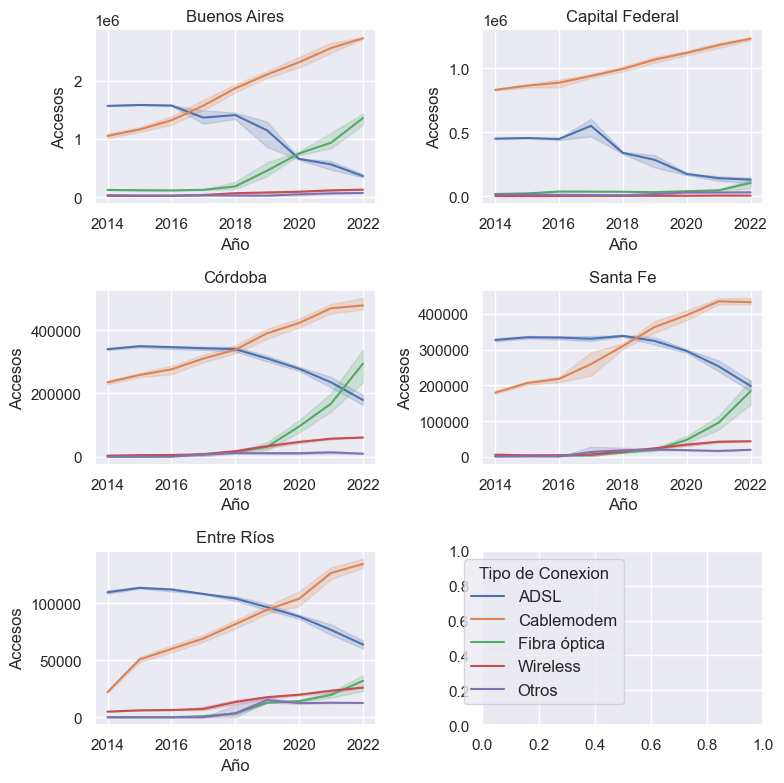

In [162]:
lineplot_list_conexion(central, 2, 8, 8, 12, 0.8, 0.3)

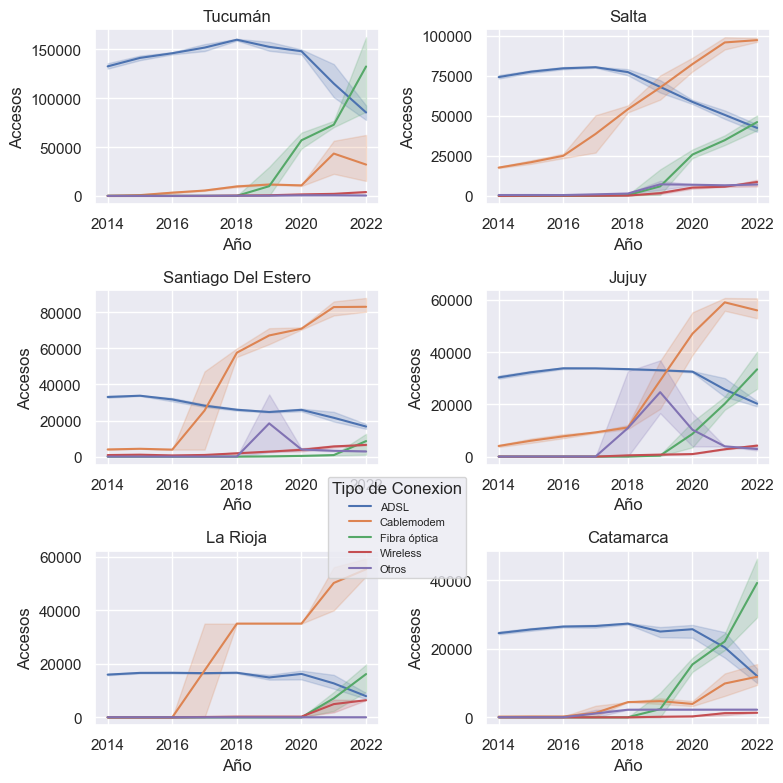

In [172]:
lineplot_list_conexion(noa, 2, 8, 8, 8, 0.6, 0.4)

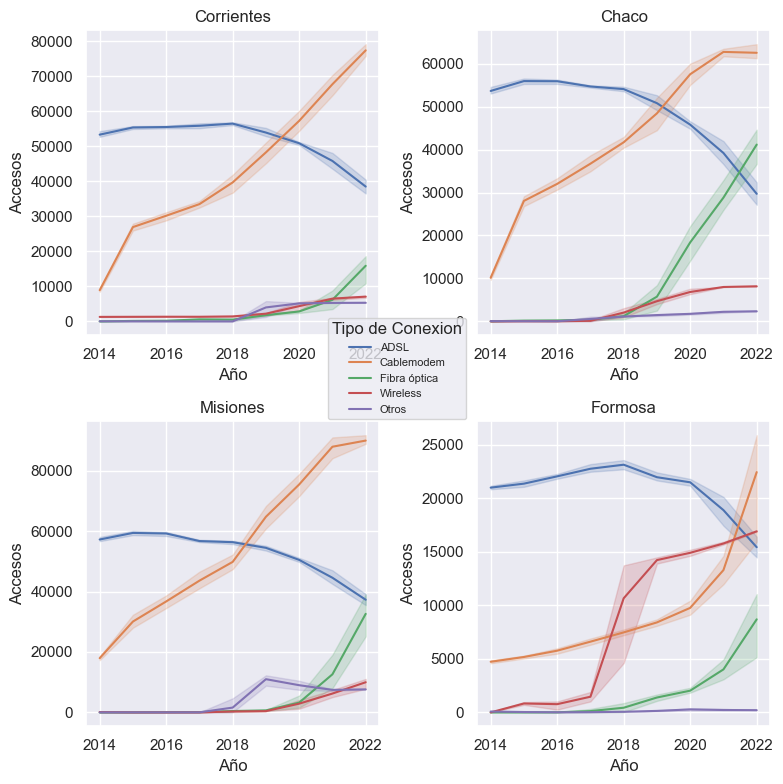

In [168]:
lineplot_list_conexion(nea, 2, 8, 8, 8, 0.6, 0.6)

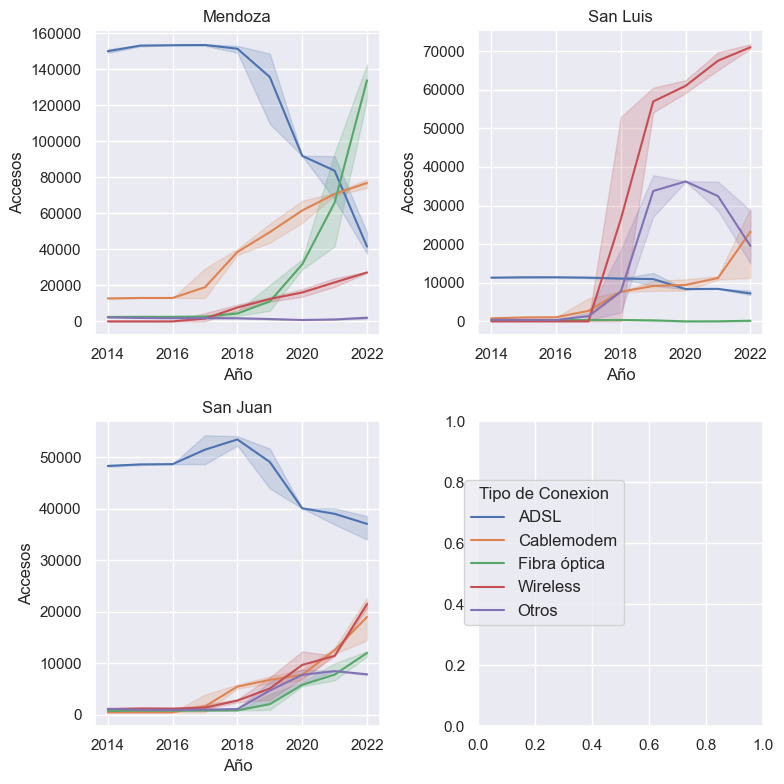

In [177]:
lineplot_list_conexion(cuyo, 2, 8, 8, 12, 0.8, 0.4)

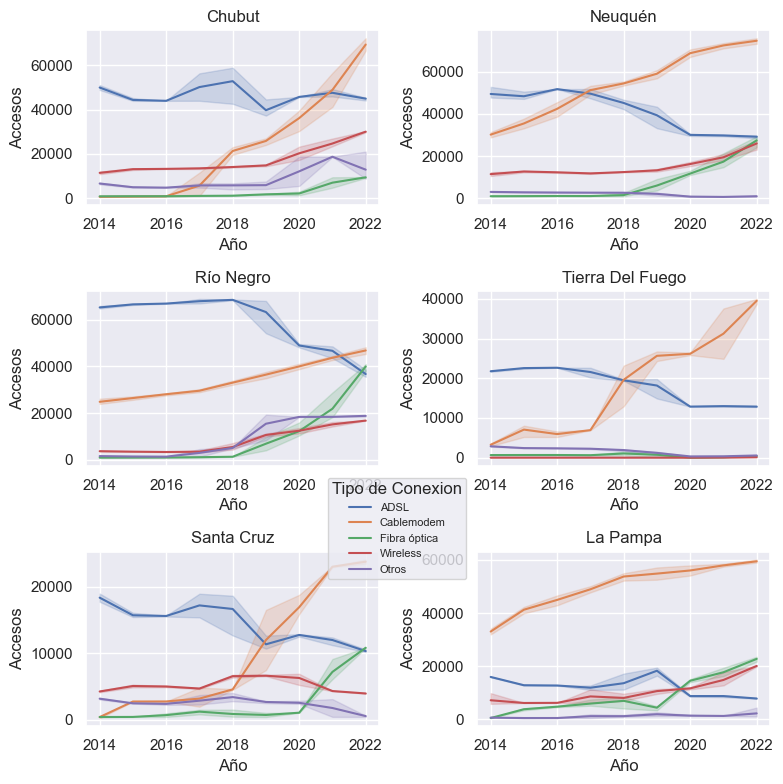

In [176]:
lineplot_list_conexion(patagonia, 2, 8, 8, 8, 0.6, 0.4)

El comportamiento de los accesos por conexion en las provincias es muy similar al comportamiento nacional, pero hay ciertos casos que vale la pena mencionar como en San Luis donde la fibra optica no hay ganado terreno mientras que el wireless ha despegado o Formosa donde todas las conexiones han aumentado excepto el ADSL o en Tucuman y Catamarca donde la fibra optica ha sobrepasado incluso al ADSL y cablemodem.

# Datos Economicos

Los datos de ingresos e indicadores macroeconomicos no nos dicen mucho por si mismos en este contexto, por lo tanto seran usados para evaluar si existen correlaciones entre estos datos y los datos tecnicos de velocidad y accesos que merezcan ser estudiadas. 

In [3]:
economia = pd.read_csv("../processed_data/datos_economicos.csv")
economia.head()

Año  Trimestre  IPC US  IPC AR  USDARS oficial  USDARS blue  PBI millones  \
0  2022          3     NaN     NaN             NaN          NaN           NaN   
1  2022          2     NaN     NaN             NaN          NaN           NaN   
2  2022          1     NaN     NaN             NaN          NaN           NaN   
3  2021          4     NaN     NaN             NaN          NaN           NaN   
4  2021          3     NaN     NaN             NaN          NaN           NaN   

   Ingresos (miles de pesos)  
0                   67055930  
1                   60335724  
2                   55589997  
3                   45467887  
4                   42999944

In [10]:
general_nacional = penetracion_velocidad_nacional_internet_fijo.merge(economia, on=["Año", "Trimestre"], how="left")
# general_nacional.drop(columns=["Año", "Trimestre"], inplace=True)
general_nacional.head()

Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2022          3                         76.64                     23.95   
1  2022          2                         75.97                     23.72   
2  2022          1                         73.88                     23.05   
3  2021          4                         73.18                     22.81   
4  2021          3                         70.58                     21.98   

   Mbps (Media de bajada)  IPC US  IPC AR  USDARS oficial  USDARS blue  \
0                   62.46     NaN     NaN             NaN          NaN   
1                   58.44     NaN     NaN             NaN          NaN   
2                   55.11     NaN     NaN             NaN          NaN   
3                   52.34     NaN     NaN             NaN          NaN   
4                   48.46     NaN     NaN             NaN          NaN   

   PBI millones  Ingresos (miles de pesos)  
0           NaN                   67055930  
1           NaN                   60335724  
2           NaN                   55589997  
3           NaN                   45467887  
4           NaN                   42999944

c:\Users\ASUS X515\Documents\Programacion_Data\proyectos\argentinian-telecommunications-analysis\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


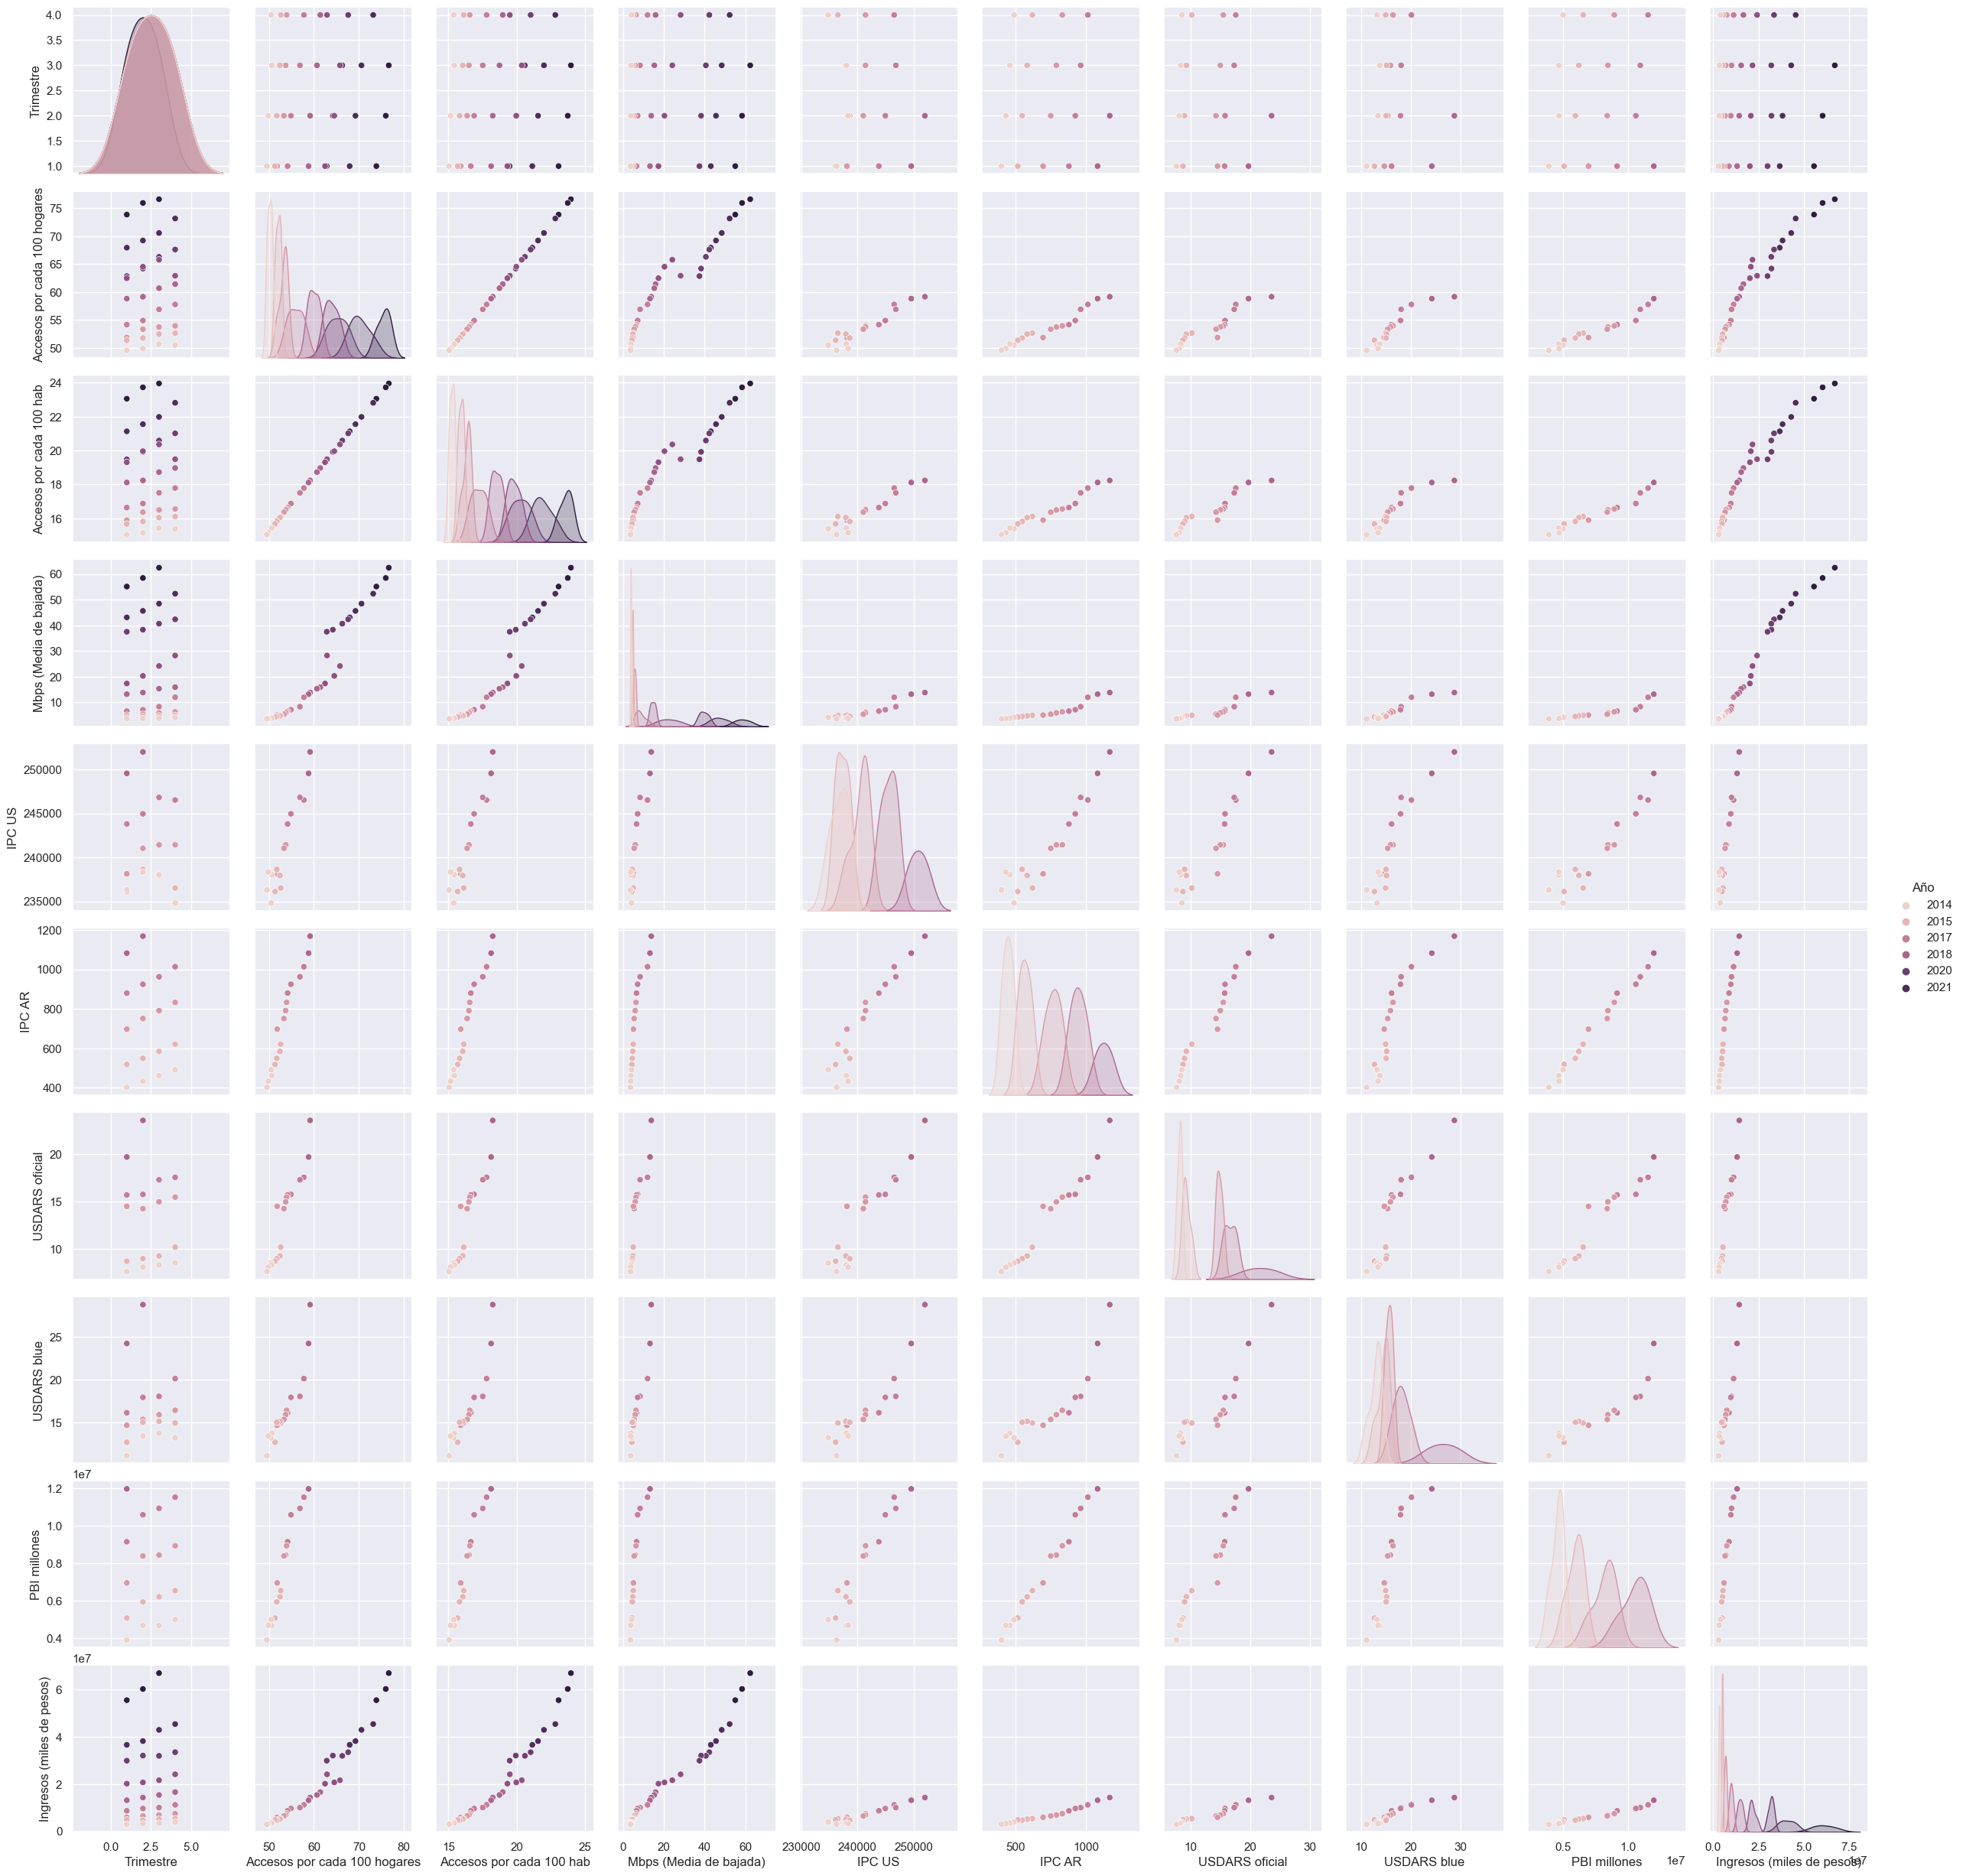

In [11]:
sns.pairplot(data=general_nacional, hue="Año")

In [20]:
general_nacional[general_nacional["Año"] == 2021]

Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
3  2021          4                         73.18                     22.81   
4  2021          3                         70.58                     21.98   
5  2021          2                         69.24                     21.55   
6  2021          1                         67.95                     21.13   

   Mbps (Media de bajada)  IPC US  IPC AR  USDARS oficial  USDARS blue  \
3                   52.34     NaN     NaN             NaN          NaN   
4                   48.46     NaN     NaN             NaN          NaN   
5                   45.63     NaN     NaN             NaN          NaN   
6                   43.11     NaN     NaN             NaN          NaN   

   PBI millones  Ingresos (miles de pesos)  
3           NaN                   45467887  
4           NaN                   42999944  
5           NaN                   38239667  
6           NaN                   36676371

<Axes: >

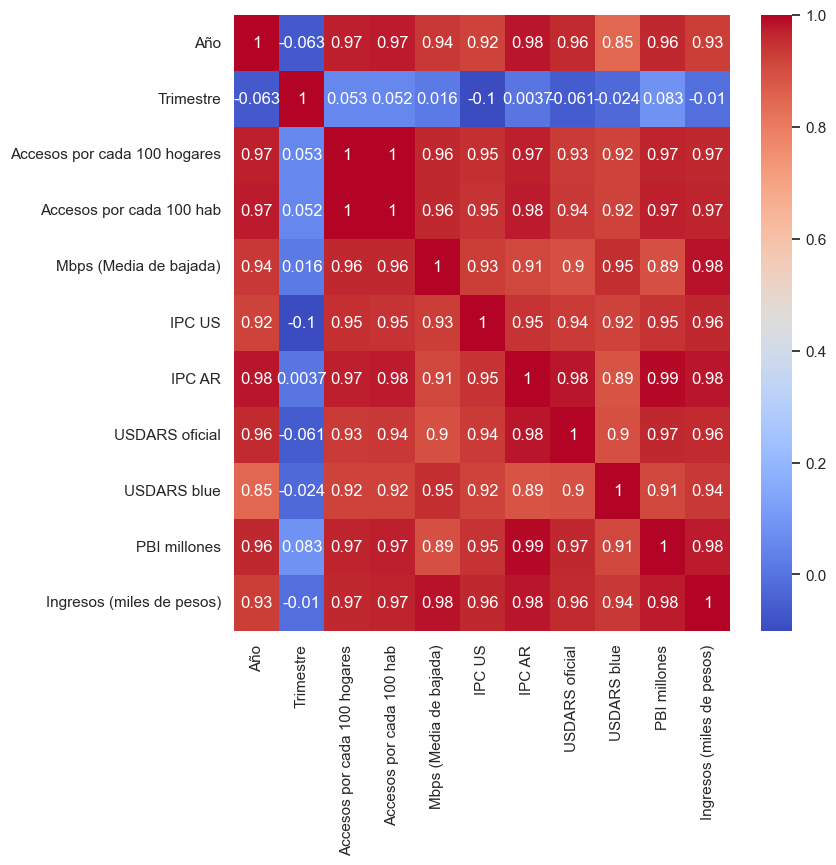

In [24]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(data=general_nacional.corr(), annot=True, cmap="coolwarm")